# Bernoulli Distribution

This notebook aims to demonstrate the concepts of of *conjugacy* and the interplay between *likelihood*, *prior* and *posterior*. For this case the data is *binary*.

We will use the example of modelling a coin toss. We will paramterise the system using a single parameter that describes how often we get each outcome, with the coin analogy being how biased the coin is. We refer to a single outcome of the system as $x$ and if we run the system for $N$ iterations we will refere to all the data $\mathbf x$.

We will first create a function to generate the data by sampling from a distribution with known parameters, the machine learning task is the to *recover* the parameters of the distribution from **only** the data-points.

In order to phrase this as an ML problem we need to formulate the probabilistic objects that constite the model by which the data have been generated.

## Likelihood

For a binary system it makes sense to model the likelihood as a *Bernoulli Distribution*:

\begin{equation*}
p(x|\mu)Bern(x|\mu) = \mu^x(1-\mu)^{1-x}
\end{equation*}

This distribution takes a single parameter $\mu$ which completely parametrises our likelihood. This means, we have a **conditional distribution** and the system is completely specified by $\mu$. If we know $\mu$ we can generate output that is similar to what the actual system does, this means we can *predict how the system behaves*.

So far we have only set the likelihood for one data-point, what about when we see lots of them? Now we will make our first assumption, that **each output of the system is independent**. This means that we can factorise the distribution over several trials in a simple manner (ie. add them together):

\begin{equation*}
p(\mathbf x|\mu) = \prod^N_{i=1}Bern(x|\mu) = \prod^N_{i=1}\mu^x(1-\mu)^{1-x}
\end{equation*}

Now we have the likelihood for the whole data-set $\mathbf x$. This means:

- Each data-point is independent as our likelihood function is invariant to any permutation of the data.
- It assumes that each of the data-points are generated by the same distribution. For the coin example thi smeans that by tossing the coin you do not change the actual coin by tossing it.

## Prior

In order to say something about the system we need to have a prior belief about what we think the parameter $\mu$ is.

If our system is the outcome of a coin toss then some prior knowledge is that moist coins that we toss are unbiased. Once we have specified the prior we can use Bayes' rule to get the posterior:

\begin{equation*}
p(\mathbf x|\mu)=\dfrac{p(\mathbf x|\mu)p(\mu)}{p(\mathbf x)}
\end{equation*}

What distribution should we use for the prior? If you choose your prior or likelihood wrong then this computation might not even be analytically possible to perform. So this is when we will use *conjugacy*. First, let's note that the **posterior distribution is proportional to the likelihood times the prior** (or the **joint distribution**).

\begin{equation*}
p(\mu|\mathbf x) \propto p(\mathbf x|\mu)p(\mu)
\end{equation*}

Second, it makes sense that if I have a prior of a specific form (eg. a Gaussian) then I would like the posterior to be of the same form (ie. Gaussian). So this means we should *choose* a prior such that when multiplied with the likelihood it leads to a distribution that is of the same form of the prior.

This is useful becaue we do **not** have to compute the denominator in Bayes' rule, the only thing we need to do is multiply the prior with the likelihood and then **identify** the parameters of the distribution (which we can do as we know its form).

For the Bernoulli distriubtion the conjugate prior to its only parameter $\mu$ is the Beta distribution.

\begin{equation*}
Beta(\mu|a,b) = \dfrac{\Gamma(a+b)}{\Gamma(a)\Gamma(b)}\mu^{a-1}(1-\mu)^{b-1}
\end{equation*}

where $\Gamma(\cdot)$ is the gamma function. The role of the Gamma function is to normalise this to make sure it becomes a distribution noto just any function.

## Posterior

To get the posterior we are going to multiply the likelihood and the prior together.

\begin{equation*}
p(\mu|\mathbf x) \propto p(\mathbf x|\mu)p(\mu)\\
= \prod^N_{i=1}Bern(x|\mu)Beta(\mu|a,b)\\
= \prod^N_{i=1}\mu^x_i(q-\mu)^{1-x_i}\dfrac{\Gamma(a+b)}{\Gamma(a)\Gamma(b)}\mu^{a-1}(1-\mu)^{b-1}\\
=\mu\sum_ix_i(1-\mu)\sum_i(1-x_i)\dfrac{\Gamma(a+b)}{\Gamma(a)\Gamma(b)}\mu^{a-1}(1-\mu)^{b-1}\\
=\dfrac{\Gamma(a+b)}{\Gamma(a)\Gamma(b)}\mu\sum_ix_i(1-\mu)\sum_i(1-x_i)\mu^{a-1}(1-\mu)^{b-1}\\
=\dfrac{\Gamma(a+b)}{\Gamma(a)\Gamma(b)}\mu\sum_ix_i+a-1(1-\mu)\sum_i(1-x_i)+b-1\\
\end{equation*}

Now comes the trick with conjugacy, *we know the form of the posterior*. This means we can just identify the parameters of the posterior:

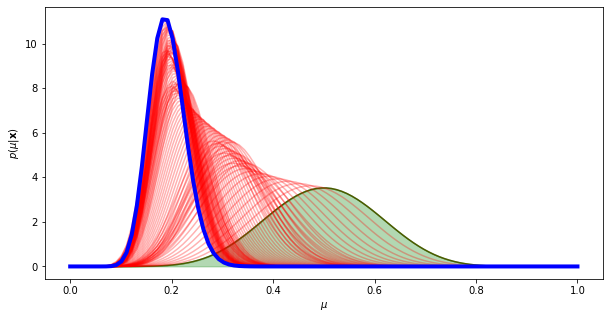

In [31]:
import numpy as np
from scipy.stats import beta
import matplotlib.pyplot as plt

def posterior(a,b,X):
    a_n = a + X.sum()
    b_n = b+(X.shape[0] - X.sum())
    
    return beta.pdf(mu_test, a_n, b_n)

# Parameters to generate the data
mu = .2
N = 100

# Generate some test data
X = np.random.binomial(1, mu, N)
mu_test = np.linspace(0, 1, 100)

# Define our prior
a = 10
b = 10

# p(mu) = Beta(alpha, beta)
prior_mu = beta.pdf(mu_test, a, b)

# Create figure
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111)

# Plot prior
ax.plot(mu_test, prior_mu, 'g')
ax.fill_between(mu_test, prior_mu, color='green', alpha=0.3)

ax.set_xlabel('$\mu$')
ax.set_ylabel('$p(\mu|\mathbf{x})$')


# pick a random (uniform) point from the data
# and update our assumption with this
index = np.random.permutation(X.shape[0])
for i in range(0, X.shape[0]):
    y = posterior(a, b, X[:index[i]])
    plt.plot(mu_test, y, 'r', alpha=.3)

y = posterior(a, b, X)
plt.plot(mu_test, y, 'b', linewidth=4.0)

plt.show()